In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from useful_scit.imps import *
import flexpart_management.modules.FlexLogPol as FLP
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

reload


In [3]:
path = '/Volumes/mbProD/Downloads/flx_log_coor/run_2019-08-18_18-46-19_'
# flp = FLP.FlexLogPol(path,concat=True)
# self = FLP.FlexLogPol(path,concat=False)
self = FLP.FlexLogPol(
    path,
#     concat=True,
    concat=False,
    get_clusters=False,
    open_merged=True,
    clusters_avail=False
)

'using vol for conc'


In [4]:
self.reset_z_levels()

'using vol for conc'


In [5]:
dsF= self.filter_hours_with_few_mea()

In [6]:
dsSM = ds1 = FLP.smooth_merged_ds(dsF)

(3888, 6, 35, 36)
(3888, 6, 35, 36)
(3888, 6, 35, 36)
(3888, 6, 35, 36)


(-25, -7)

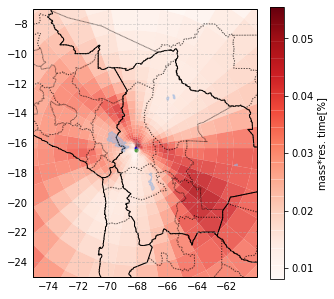

In [7]:
cl = co.CPer
c1 =ds1[cl].sum([co.RL,co.ZM])
c2 = ds1[cl].sum([co.ZM,co.RL,co.TH_CENTER])
ar = c1/c2
# ar = c1
ar = ar.isel(**{co.R_CENTER:slice(0,-3)})
ax = fa.get_ax_bolivia(fig_args={'figsize':(5,5)})
fa.logpolar_plot(ar,name=co.CPer,ax=ax,perM=.95,perm=.01)
ax.set_xlim(-75,-60)
ax.set_ylim(-25,-7)
# ax = fa.get_ax_lapaz()
# fa.logpolar_plot(ar,name=co.CPer,ax=ax,perM=.95)

In [8]:
ax.figure.savefig('/tmp/map.pdf')

# new part

In [9]:
dsZ = dsSM

In [10]:
dfcc = self.get_vector_df_for_clustering(self.coarsen_par,ar=dsZ[co.CONC])

In [11]:
nc = 15

In [12]:
dfres = self.python_cluster(n_cluster=nc,df=dfcc,return_df=True)

In [13]:
dsZ[co.ClusFlag]=dfres[co.ClusFlag].to_xarray()

In [14]:
dg = dsZ.assign_coords(**{co.ClusFlag:dsZ[co.ClusFlag],co.TOPO:dsZ[co.TOPO]})
dg = dg.groupby(co.ClusFlag)
dg = dg.sum('stacked_R_CENTER_TH_CENTER_ZMID')

In [15]:
df = dg.to_dataframe()

In [16]:
df1 = df[co.CPer]

In [17]:
df2 = df1.unstack(co.ClusFlag)

In [18]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/pandas/plotting/_tools.py:203: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/pandas/plotting/_core.py:1801: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


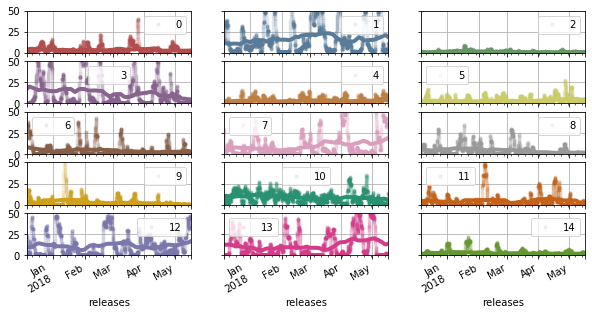

In [19]:
set_matplotlib_formats('png')
axs = df2.plot(subplots=True,sharex=True,sharey=True,color = FLP.COLORS,
              figsize=(10,5),layout=(int(np.ceil(nc/3)),3),grid=True,marker='.',linewidth=0,alpha=.1,
              legend=True)
df3= df2.rolling(45*24,center=True,min_periods=1,win_type='gaussian').mean(std=45*24)
axs = df3.plot(
    subplots=True,sharex=True,sharey=True,layout=(int(np.ceil(nc/3)), 3),color = FLP.COLORS,
    ylim = (0,50),grid=True,figsize=(10,5),linewidth=4,ax =axs,
    legend=False
              )

NameError: name 'bc' is not defined

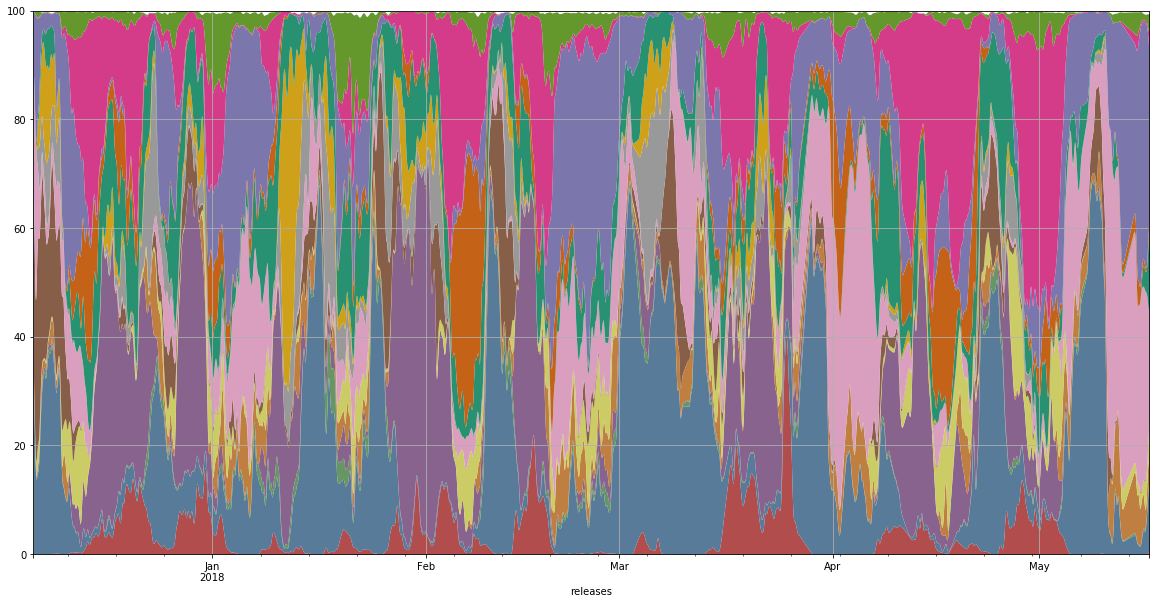

In [20]:
axs = df2.plot.area(
    subplots=False,
    layout=(int(np.ceil(nc/3)), 3),color = FLP.COLORS,
    ylim = (0,100),grid=True,figsize=(20,10),linewidth=0,
    legend=False
              )

dd = df[bc]['2017-12':'2018-05']*10

dd.plot(
    marker=',',linewidth=0,
    figsize=(10,5),
    color='k'
)
std=24
res = dd.rolling(std,min_periods=int(std/4),center=True,win_type='gaussian').mean(std=.5*std)
ax=res.plot(figsize=(20,10),color='k',linewidth=2)
# ax.set_ylim(.1,8)
# ax.set_yscale('log')
std=24*30
res = dd.rolling(std,min_periods=int(std/4),center=True,win_type='gaussian').mean(std=.5*std)
ax=res.plot(figsize=(20,10),color='k',linewidth=2)
# ax.set_ylim(.1,8)
# ax.set_yscale('log')

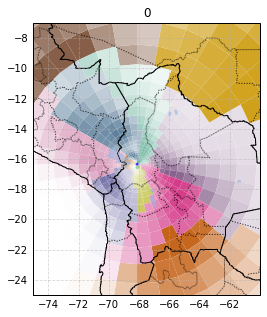

In [21]:
# top = np.asscalar(
#     (dsZ[co.CPer]/c2).quantile(.9999)
# )
c2 = dsSM[co.CPer].sum([co.ZM,co.RL,co.TH_CENTER])
for ii in range(1):
    ax = fa.get_ax_bolivia(
        fig_args={'figsize':(5,5)})
    for i in range(nc):
        cmap = fa.get_custom_cmap(self.colors[i])
        ds1 = dsZ[co.CPer].where(dsZ[co.ClusFlag]==i)
        ds1 = ds1.isel(**{co.ZM:ii})
        ds2 = ds1.sum(co.RL)
        ex = ds2.sum().values > 0
        if ex:
            fa.logpolar_plot(
                ds2,name=co.CPer,ax=ax,perM=.99,perm=0,quantile=True,colorbar=False,
                patch_args={'cmap':cmap}
            )
    ax.set_xlim(-75,-60)
    ax.set_title(ii)
    yl=ax.set_ylim(-25,-7)

In [22]:
ax.figure.savefig('/tmp/fig.pdf')

In [23]:
ii=1
ds_fl = dsZ[co.CPer].where(dsZ[co.ClusFlag]==ii)

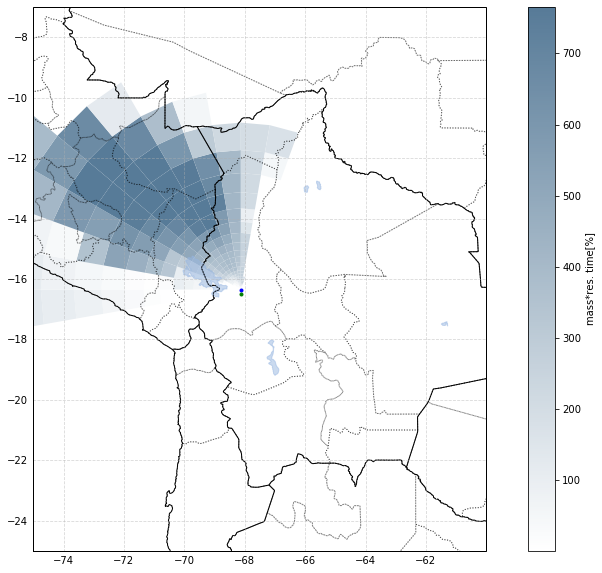

In [24]:
ax = fa.get_ax_bolivia()
cmap = fa.get_custom_cmap(self.colors[ii])
fa.logpolar_plot(ds_fl.sum([co.RL,co.ZM]),
                 name=co.CPer,ax=ax,
                 patch_args={'cmap':cmap}
                )
ax.set_xlim(-75,-60)
yl=ax.set_ylim(-25,-7)

In [25]:
import simplekml

In [26]:
import simplekml
kml = simplekml.Kml()

In [27]:
dsZ1 = dsZ.assign_coords(**{
    co.ClusFlag:dsZ[co.ClusFlag],
    co.TOPO:dsZ[co.TOPO].mean([co.RL,co.ZM])
})

In [28]:
dsM = dsZ1.mean(co.RL)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [29]:
dmm=dsM[co.CPer].mean([co.TH_CENTER,co.ZM])
dmmm = dmm.mean()
dsM1 = dsM.copy()
dsM1[co.CPer] = dsM[co.CPer]/(dmm+(.05*dmmm))

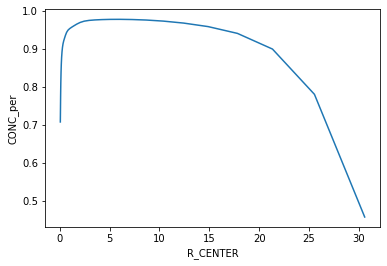

In [30]:
dmm1=dsM1[co.CPer].mean([co.TH_CENTER,co.ZM])
dmm1.plot()
# (30*dmm).plot(ylim=(0,1))

In [31]:
drop_coor_list = [co.LON,co.LAT,co.ZB,co.ZLM,co.ZT,co.VOL,co.GA]

In [32]:
dfM = dsM1.drop(drop_coor_list)[co.CPer].to_dataframe().reset_index()

In [33]:
r = dfM.iloc[100]
kml = simplekml.Kml()
sr =dfM[co.CPer]
max_col=sr[sr>0].quantile(.95)
low_thr=sr[sr>0].quantile(.4)

In [34]:
max_col,low_thr

(2.8530092092964714, 0.3537986185006874)

In [43]:
def polygon_from_row(r,kml:simplekml.Kml, max_col,low_thr):
    col = 255*np.array(FLP.COLORS[int(r[co.ClusFlag])])
#     col = 255-col
    col = col.astype('int16')
    col = list(col)
    _z  = (r[co.ZM] ) + r[co.TOPO]
    _z = 0
    points1 = [
        (r[co.LON_00], r[co.LAT_00],_z),
        (r[co.LON_10], r[co.LAT_10],_z),
        (r[co.LON_11], r[co.LAT_11],_z),
        (r[co.LON_01], r[co.LAT_01],_z)
#         (r[co.LON_00], r[co.LAT_00],_z),
    ]
    points2 = [
        (r[co.LON_00], r[co.LAT_00],_z),
#         (r[co.LON_10], r[co.LAT_10],_z),
        (r[co.LON_11], r[co.LAT_11],_z),
        (r[co.LON_01], r[co.LAT_01],_z),
        (r[co.LON_00], r[co.LAT_00],_z),
    ]    
    def make_pol(points):
        pol = kml.newpolygon(
            name = str(r.name),
            outerboundaryis = points,
            altitudemode = simplekml.AltitudeMode.clamptoground
        )

#         alpha= (255/max_col) * r[co.CPer]
#         alpha = min(int(alpha),255)
#         alpha = 255


#         pol.style.polystyle.color = simplekml.Color.rgb(*col,alpha)
        pol.style.polystyle.color = simplekml.Color.white
        pol.style.polystyle.outline = 1
        pol.style.polystyle.fill = 0 
#     if r[co.CPer]>low_thr:
    if True:
        make_pol(points1)
#         make_pol(points2)
    
   
    
    return col

In [44]:
kmlT = simplekml.Kml()
for ii in range(1):
#     _df = dfM[dfM[co.ClusFlag]==ii]
    _df = dfM[dfM.ZMID == 250]
    kml = simplekml.Kml()
    sr =dfM[co.CPer]
    max_col=sr[sr>0].quantile(.95)
    res = _df.iloc[:].apply(lambda x: polygon_from_row(x,kml,max_col,low_thr),axis = 1)
    res = _df.iloc[:].apply(lambda x: polygon_from_row(x,kmlT,max_col,low_thr),axis = 1)
    kml.save('/tmp/clus'+'lines'+'.kml')
# kmlT.save('/tmp/clusT.kml')

In [233]:
dg=dsM1.groupby(co.ClusFlag)
dd = []
ll = []
for l,ds in dg:
    dd.append(ds.unstack().drop(co.ClusFlag))
    ll.append(l) 
dc = xr.concat(dd,pd.Index(ll,name=co.ClusFlag))

In [234]:
dsum = dc[co.CPer].sum([co.TH_CENTER,co.ZM])

In [235]:
dres = (dc[co.CPer].sum([co.TH_CENTER])*dc[co.ZM]).sum(co.ZM)/dsum

In [258]:
dr1 = dres.where(dsum>.5)
dr1.name = co.CPer
df1 = dr1.to_dataframe().unstack(co.ClusFlag)

In [269]:
cols = df1.columns.levels[-1].values

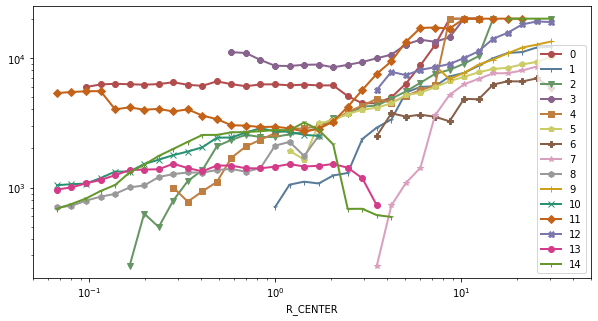

In [300]:
mks = ['o','1','v','8','s','p','P','*','h','+','x','D','X','o','1','v']
for c in cols:
    ax = df1[co.CPer][c].plot(
            color = FLP.COLORS[c],
        marker=mks[c],
    #               legend=False,
                  logy=True,
                linewidth=2,
                  logx=True,
                  figsize=(10,5),
        label=c
                 )
ax.set_xlim(.05,50)
ax.legend()

In [290]:
res = dsZ1[co.CPer].groupby(co.ClusFlag).sum()
res = 100*res /res.sum()
res = res.to_dataframe()

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/groupby.py:639: FutureWarning: Default reduction dimension will be changed to the grouped dimension in a future version of xarray. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  skipna=skipna, allow_lazy=True, **kwargs)


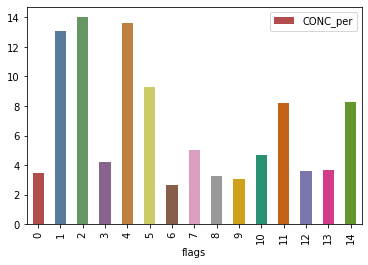

In [291]:
res.reset_index().plot.bar(x=co.ClusFlag,y=co.CPer,color = FLP.COLORS)

In [304]:
hour = dsZ1[co.RL].to_dataframe()
hour['hour'] = (hour.index + pd.Timedelta(-4,'hour')).hour
hour = hour['hour'].to_xarray()
dsZ1 = dsZ1.assign_coords(**{'hours':hour})

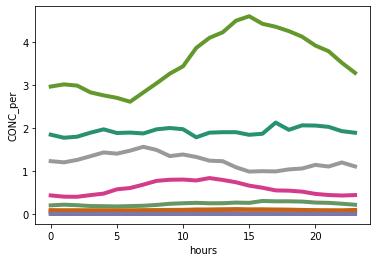

In [326]:
for i in range(nc):
    bo = (dsZ1[co.ClusFlag]==i)
    res = dsZ1[co.CPer].where(bo).sel(
        **{co.R_CENTER:slice(0,.5),co.ZM:slice(0,100000)}
    ).sum([co.TH_CENTER,co.R_CENTER,co.ZM]).groupby('hours').median()
    res.plot(color=FLP.COLORS[i],linewidth=4)

In [345]:
path_bc = '/Users/diego/JUP/co_bc/data/horiba_chc_corrected_diego.csv'

In [346]:
bc,CO,h  = 'abs670','CO_ppbv','hour'
lh = 'Local Time'
dt = 'date'
df = pd.read_csv(path_bc)
df[lh]=np.mod(df[h]-4,24)

In [347]:
df[dt] = pd.to_datetime(df[dt])
df = df.set_index(dt)

In [348]:
desc = df.groupby(lh)[bc].describe()

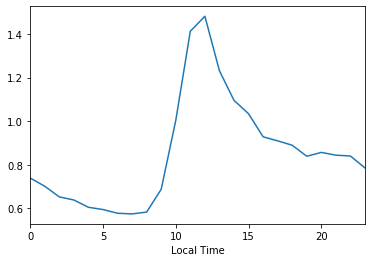

In [349]:
desc['50%'].plot()

(0.1, 8)

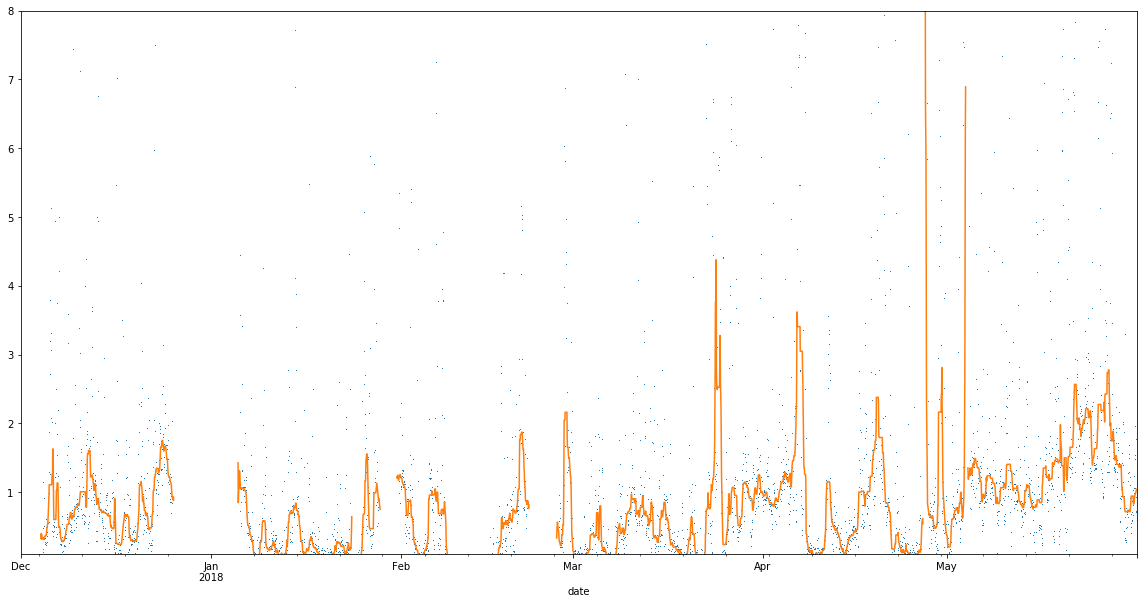

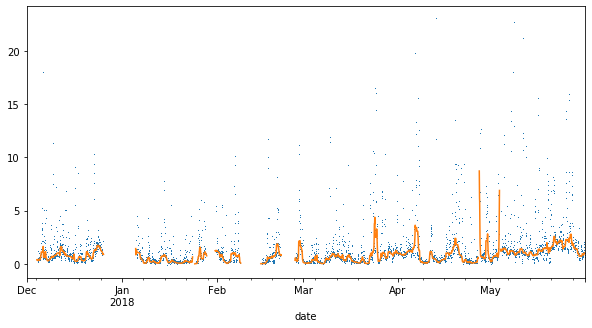

In [387]:
dd = df[bc]['2017-12':'2018-05']

dd.plot(
    marker=',',linewidth=0,
    figsize=(10,5)
)
std=24
res = dd.rolling(std,min_periods=int(std/4),center=True).median()
ax=res.plot()
# ax.set_ylim(.1,12)
# ax.set_yscale('log')

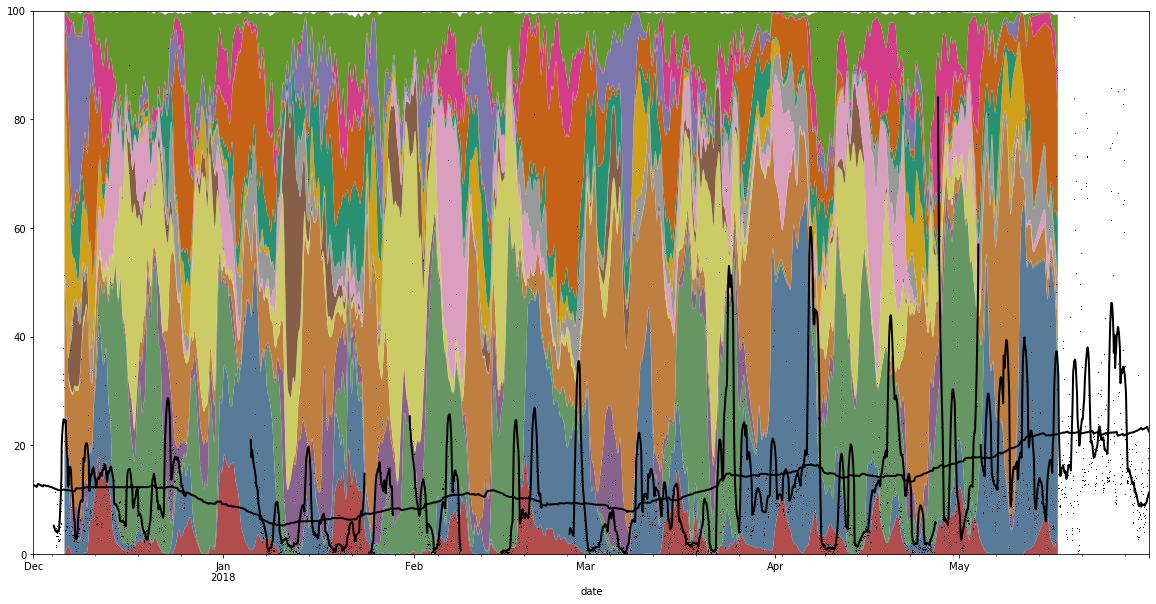

In [518]:
axs = df2.plot.area(
    subplots=False,
    layout=(int(np.ceil(nc/3)), 3),color = FLP.COLORS,
    ylim = (0,100),grid=True,figsize=(20,10),linewidth=0,
    legend=False
              )

dd = df[bc]['2017-12':'2018-05']*10

dd.plot(
    marker=',',linewidth=0,
    figsize=(10,5),
    color='k'
)
std=24
resI = res = dd.rolling(std,min_periods=int(std/4),center=True,win_type='gaussian').mean(std=.5*std)
ax=res.plot(figsize=(20,10),color='k',linewidth=2)
# ax.set_ylim(.1,8)
# ax.set_yscale('log')
std=24*30
res = dd.rolling(std,min_periods=int(std/4),center=True,win_type='gaussian').mean(std=.5*std)
ax=res.plot(figsize=(20,10),color='k',linewidth=2)
# ax.set_ylim(.1,8)

In [522]:
aa = pd.DataFrame(df2.stack())
# aa.name=co.CPer
aa=aa.rename(index=str,columns={0:co.CPer})
# aa=aa.to_xarray()

In [506]:
# aa[co.RL].values=pd.to_datetime(aa[co.RL].values)

In [507]:
aa

<xarray.Dataset>
Dimensions:   (flags: 15, releases: 3888)
Coordinates:
  * releases  (releases) datetime64[ns] 2017-12-06 ... 2018-05-16T23:00:00
  * flags     (flags) object '0' '1' '10' '11' '12' '13' ... '5' '6' '7' '8' '9'
Data variables:
    CONC_per  (releases, flags) float32 0.15840915 18.477314 ... 0.96156096
    abs670    (releases) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [501]:
dd.index.name=co.RL

In [502]:
dd.name=bc

In [503]:
aa[bc]=dd.to_xarray()

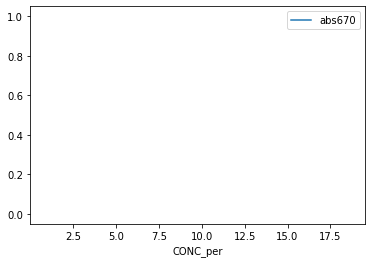

In [504]:
dfa=aa.sel(**{co.ClusFlag:'0'}).to_dataframe()
dfa.plot(x=co.CPer,y=bc)

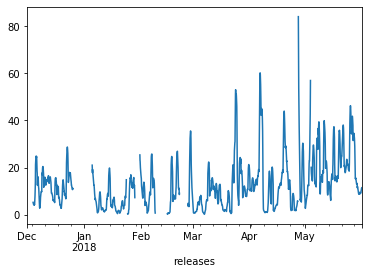

In [558]:
resI.plot()

In [527]:
resI.index.name = co.RL
res2 = pd.merge(resI,aa,left_index=True,right_index=True)

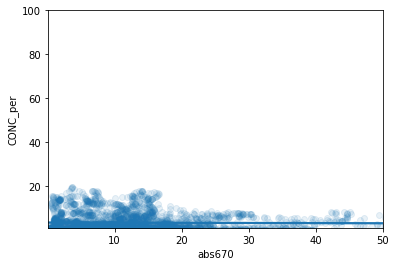

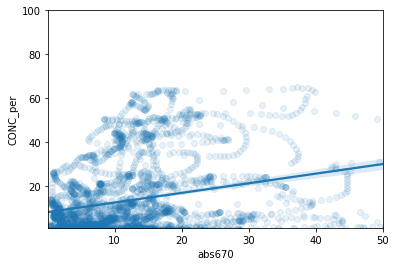

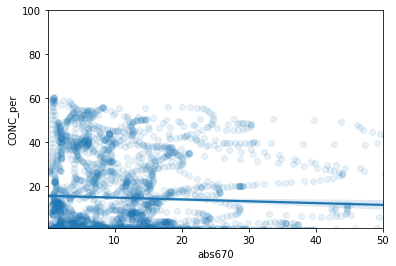

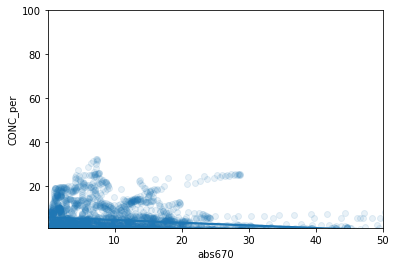

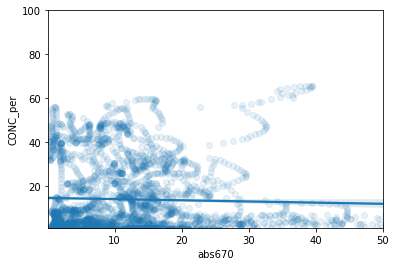

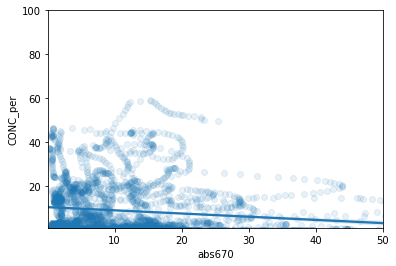

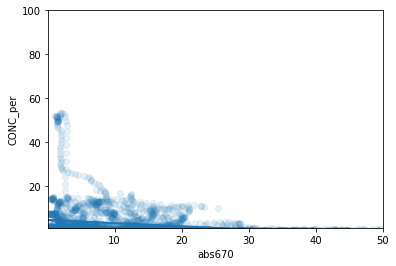

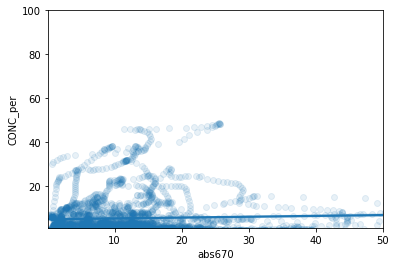

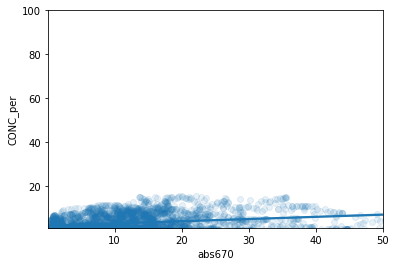

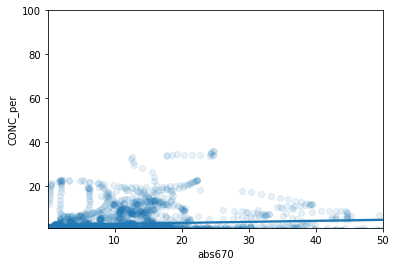

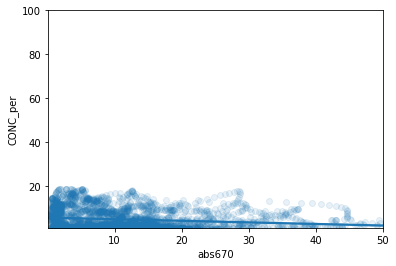

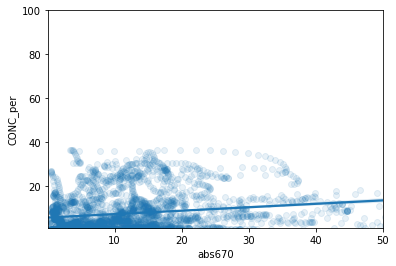

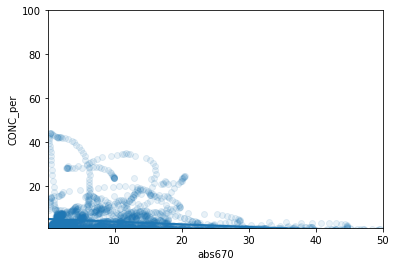

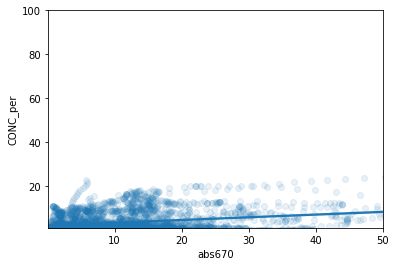

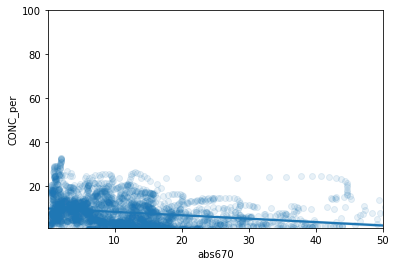

In [577]:
for i in range(nc):
    f,a=plt.subplots()
    tr=res2[res2.index.get_level_values(co.ClusFlag) == str(i)]
    # tr.plot.scatter(x=co.CPer,y=bc,loglog=True,alpha=.01,xlim=(1,100),ylim=(.1,100))
    ax=sns.regplot(y=co.CPer,x=bc,data=tr,scatter_kws={'alpha':.1},
                   lowess=False)
#     ax.set_yscale('log')
#     ax.set_xscale('log')
    ax.set_ylim(1,100)
    ax.set_xlim(.1,50)

In [579]:
import scipy.optimize.nnls as nnls

In [598]:
res2=res2.dropna()

In [639]:
A = res2[co.CPer].unstack().values

In [736]:
A = dsZ1[co.CPer].to_dataframe()[co.CPer]

In [649]:
aa = A[co.CPer].dropna()

In [737]:
at = A.unstack(co.RL).T

In [760]:
aabb=pd.merge(at,dd,left_index=True,right_index=True)
aabb = aabb.dropna(axis=0,subset=[bc])
aabb = aabb.dropna(axis=0,subset=cl,how='all')

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [761]:
aabb[aabb.isnull()]=0

In [762]:
b = aabb[bc]
bv = b.values

In [763]:
cl = aabb.columns[:-1]
A = aabb[cl]
Av = A.values

In [721]:
b = res2[bc].unstack()['1'].values

In [734]:
b

Series([], Name: abs670, dtype: float64)

In [765]:
# res = nnls(A,b)
res = nnls(Av[:],bv[:])

In [781]:
r0 =res[0]
r1=r0[r0>20]

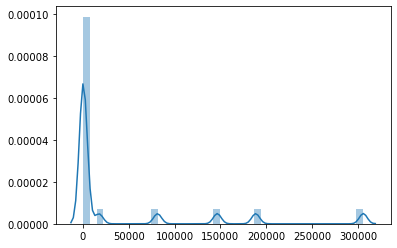

In [782]:
sns.distplot(r1)

In [612]:
cols =res2[co.CPer].unstack().columns.values

In [619]:
r1 = pd.Series(res[0],index=cols)

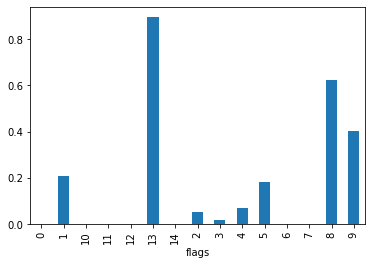

In [629]:
r1.plot.bar()

In [630]:
r1.index.name=co.ClusFlag

In [635]:
r2=(res2[co.CPer]*r1)

In [638]:
r2.unstack()

flags,0,1,10,11,12,13,14,2,3,4,5,6,7,8,9
releases,,,,,,,,,,,,,,,
2017-12-06 00:00:00,0.0,3.819554,0.0,0.0,0.0,0.840128,0.0,0.005065,0.004175,2.100410,0.012025,0.0,0.0,0.717705,14.484265
2017-12-06 01:00:00,0.0,4.059379,0.0,0.0,0.0,0.921566,0.0,0.004605,0.003760,2.014088,0.011071,0.0,0.0,0.717758,14.337210
2017-12-06 02:00:00,0.0,4.325191,0.0,0.0,0.0,1.033765,0.0,0.004088,0.003359,1.907734,0.010021,0.0,0.0,0.705932,14.161860
2017-12-06 03:00:00,0.0,4.588842,0.0,0.0,0.0,1.178349,0.0,0.003579,0.003094,1.785348,0.009069,0.0,0.0,0.677927,13.976564
2017-12-06 04:00:00,0.0,4.817064,0.0,0.0,0.0,1.353830,0.0,0.003166,0.003137,1.653324,0.008510,0.0,0.0,0.632021,13.806456
2017-12-06 05:00:00,0.0,4.977661,0.0,0.0,0.0,1.555616,0.0,0.002947,0.003719,1.519490,0.008724,0.0,0.0,0.570044,13.676783
2017-12-06 06:00:00,0.0,5.045263,0.0,0.0,0.0,1.776277,0.0,0.003017,0.005114,1.391872,0.010143,0.0,0.0,0.497163,13.605092
2017-12-06 07:00:00,0.0,5.005558,0.0,0.0,0.0,2.005895,0.0,0.003444,0.007615,1.277438,0.013175,0.0,0.0,0.420515,13.595205
2017-12-06 08:00:00,0.0,4.857558,0.0,0.0,0.0,2.232706,0.0,0.004260,0.011480,1.181025,0.018124,0.0,0.0,0.347278,13.635576
